**Sentiment Analysis Mie Gacoan Purwakarta GoFood Reviews using TextBlob**

1. Install Python library

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from textblob import TextBlob
from googletrans import Translator
from sklearn.feature_extraction.text import CountVectorizer

2. Load dataset

In [ ]:
dataset = '/content/Mie Gacoan Purwakarta Gofood Reviews.csv'  # ganti dengan nama file yang di-upload
df = pd.read_csv(dataset)

3. Show the first few lines from the dataset

In [ ]:
print(df.head())

  Initial            Name                                   User  Rate  \
0      YR    Y*** R******       Pengguna Gojek sejak 1 Juni 2022     2   
1      NS        N S*****       Pengguna Gojek sejak 3 Juni 2024     5   
2       N           Novia       Pengguna Gojek sejak 7 Juli 2022     2   
3      as  asep saepullah  Pengguna Gojek sejak 16 Februari 2019     5   
4       L            Lina    Pengguna Gojek sejak 5 Oktober 2022     4   

                                             Comment  \
0                                    Lv ny ketukerrr   
1                                  lovvveee gacoaann   
2  harusnya gojek di prioritaskan ya, ini barusan...   
3                          kualitas ok, kecepatan ok   
4  Kemasan nya kok gak kaya yg di Bandung ya pake...   

                                                Menu  \
0  Mie Gacoan lv 3 - Gacoan Fest C N P - Mie Gaco...   
1  Mie Gacoan lv 2 - Mie Hompimpa lv 3 - Orange N...   
2   Mie Gacoan lv 1 - Lumpia Udang - Vanila Latte 

4. Make a stemmer

In [ ]:
factory = StemmerFactory()
stemmer = factory.create_stemmer()

5. Create a function for stemming

In [ ]:
def preprocess_review(review):
    return stemmer.stem(review)

6. Apply preprocessing to each review

In [ ]:
df['cleaned_comment'] = df['Comment'].apply(preprocess_review)

7. Translate Indonesian reviews to English using googletrans library

In [ ]:
translator = Translator()
df['translated_comment'] = df['cleaned_comment'].apply(lambda x: translator.translate(x, src='id', dest='en').text)

8. Show some lines with translated reviews

In [ ]:
print(df[['Comment', 'cleaned_comment', 'translated_comment']].head())

                                             Comment  \
0                                    Lv ny ketukerrr   
1                                  lovvveee gacoaann   
2  harusnya gojek di prioritaskan ya, ini barusan...   
3                          kualitas ok, kecepatan ok   
4  Kemasan nya kok gak kaya yg di Bandung ya pake...   

                                     cleaned_comment  \
0                                    lv ny ketukerrr   
1                                  lovvveee gacoaann   
2  harus gojek di prioritas ya ini barusan lama b...   
3                               kualitas ok cepat ok   
4  kemas nya kok gak kaya yg di bandung ya pake d...   

                                  translated_comment  
0                                      LV is ketuker  
1                                     Loveeee Gacoan  
2  You have to go a motorbike in priority, this i...  
3                                   ok quality ok ok  
4  How come the pack is not like the one in Bandu..

9. Create a function to calculate sentiment using TextBlob

In [ ]:
def get_sentiment(review):
    analysis = TextBlob(review)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity == 0:
        return 'Neutral'
    else:
        return 'Negative'

10. Add sentiment column to DataFrame

In [ ]:
df['sentiment'] = df['translated_comment'].apply(get_sentiment)

11. Show some lines with sentiment

In [ ]:
print(df[['Comment', 'translated_comment', 'sentiment']].head())

                                             Comment  \
0                                    Lv ny ketukerrr   
1                                  lovvveee gacoaann   
2  harusnya gojek di prioritaskan ya, ini barusan...   
3                          kualitas ok, kecepatan ok   
4  Kemasan nya kok gak kaya yg di Bandung ya pake...   

                                  translated_comment sentiment  
0                                      LV is ketuker   Neutral  
1                                     Loveeee Gacoan   Neutral  
2  You have to go a motorbike in priority, this i...  Negative  
3                                   ok quality ok ok  Positive  
4  How come the pack is not like the one in Bandu...   Neutral  


12. Visualize the result of sentiment

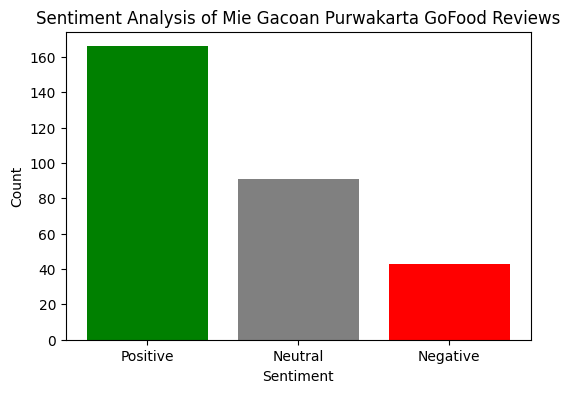

In [ ]:
sentiment_count = df['sentiment'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(sentiment_count.index, sentiment_count.values, color=['green', 'gray', 'red'])
plt.title('Sentiment Analysis of Mie Gacoan Purwakarta GoFood Reviews')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

13. Identify positive and negative reviews based on common words

In [ ]:
positive_reviews = df[df['sentiment'] == 'Positive']['translated_comment']
negative_reviews = df[df['sentiment'] == 'Negative']['translated_comment']

14. Use CountVectorizer to extract the words

In [ ]:
vectorizer = CountVectorizer(max_features=10, stop_words='english')
positive_counts = vectorizer.fit_transform(positive_reviews).sum(axis=0)
negative_counts = vectorizer.fit_transform(negative_reviews).sum(axis=0)

In [ ]:
positive_features = vectorizer.get_feature_names_out()
negative_features = vectorizer.get_feature_names_out()

In [ ]:
positive_counts_df = pd.DataFrame(positive_counts, columns=positive_features)
negative_counts_df = pd.DataFrame(negative_counts, columns=negative_features)

15. Show common words in positive and negative reviews

In [ ]:
# Menampilkan kata-kata umum di ulasan positif dan negatif
print("Top words in positive reviews:")
print(positive_counts_df)

Top words in positive reviews:
   eating  gaco  level  like  long  message  noodles  spicy  tasty  time
0      37    13     36    22    13       18       32     27     15    15


In [ ]:
print("Top words in negative reviews:")
print(negative_counts_df)


Top words in negative reviews:
   eating  gaco  level  like  long  message  noodles  spicy  tasty  time
0       7     7      8     7     7        4       10     14      6     7
